In [2]:
import os
import numpy as np
from text_processing.process_data import *
from text_processing.dea import *

import warnings
warnings.filterwarnings('ignore')

## Data Exploratory and Analysis

In [3]:
# paths
files_folder = 'lang_files/'
files_path = os.path.join(os.getcwd(), files_folder)

# initial data
lang_data = compile_all_data(files_path)
lang_data.head()

,sentence,language
0,"Dili, 11 Outubru 2021 - Gabinete Apoiu Ativida...",tet
1,Treinamentu ne’e ninia objetivu prinsipál mak ...,tet
2,Iha loron daruak hosi treinamentu ne’e partisi...,tet
3,Partisipante na’in-56 iha treinamentu ne’e mai...,tet
4,Komunidade iha suku Bikeli ho Makadade agrades...,tet


In [4]:
# after preprocessed and counted each sentence length
clean_data = clean_data_with_count(files_path)
clean_data.head()

,sentence,language,sentence_length
0,dili outubru gabinete apoiu atividade kónjuge...,tet,275
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet,232
2,iha loron daruak hosi treinamentu ne’e partisi...,tet,288
3,partisipante na’in iha treinamentu ne’e mai ho...,tet,82
4,komunidade iha suku bikeli ho makadade agrades...,tet,320


In [5]:
# confirm that data was cleaned.
clean = clean_data[(clean_data['sentence'] =='') & (clean_data['sentence'] ==' ')]
try:
    assert len(clean) == 0
    print("The data is cleaned.")
except AssertionError:
    print("The data is NOT cleaned.")

The data is cleaned.


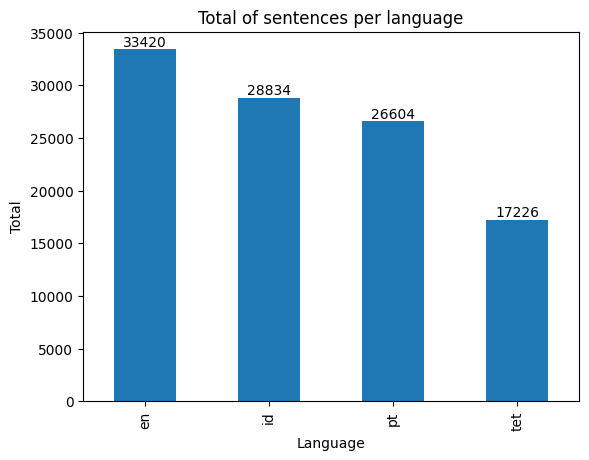

In [6]:
# General data info
display_data_in_bar(clean_data)

In [7]:
# words summary
print(f"Words summary before normalizing:")
words_summary(clean_data)

Words summary before normalizing:


,language,max_words/sentence,min_words/sentence,avg_words/sentence,total_words_in_doc
0,tet,208,1,30.558342,526398
1,pt,1339,1,22.433393,596818
2,en,214,1,19.222412,642413
3,id,1632,1,17.741139,511548


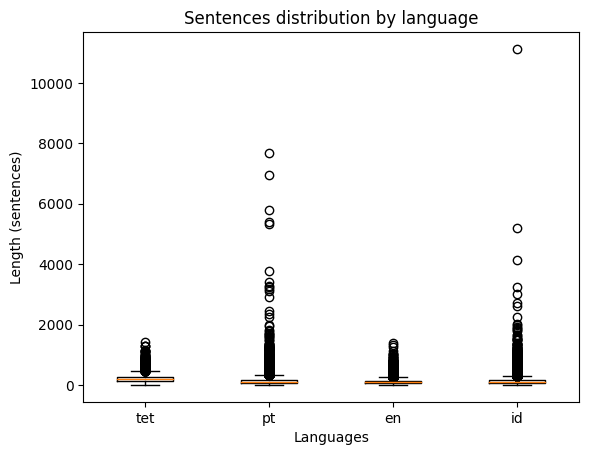

In [8]:
# A plot contains boxplot for each languages
display_data_in_boxplot(clean_data)

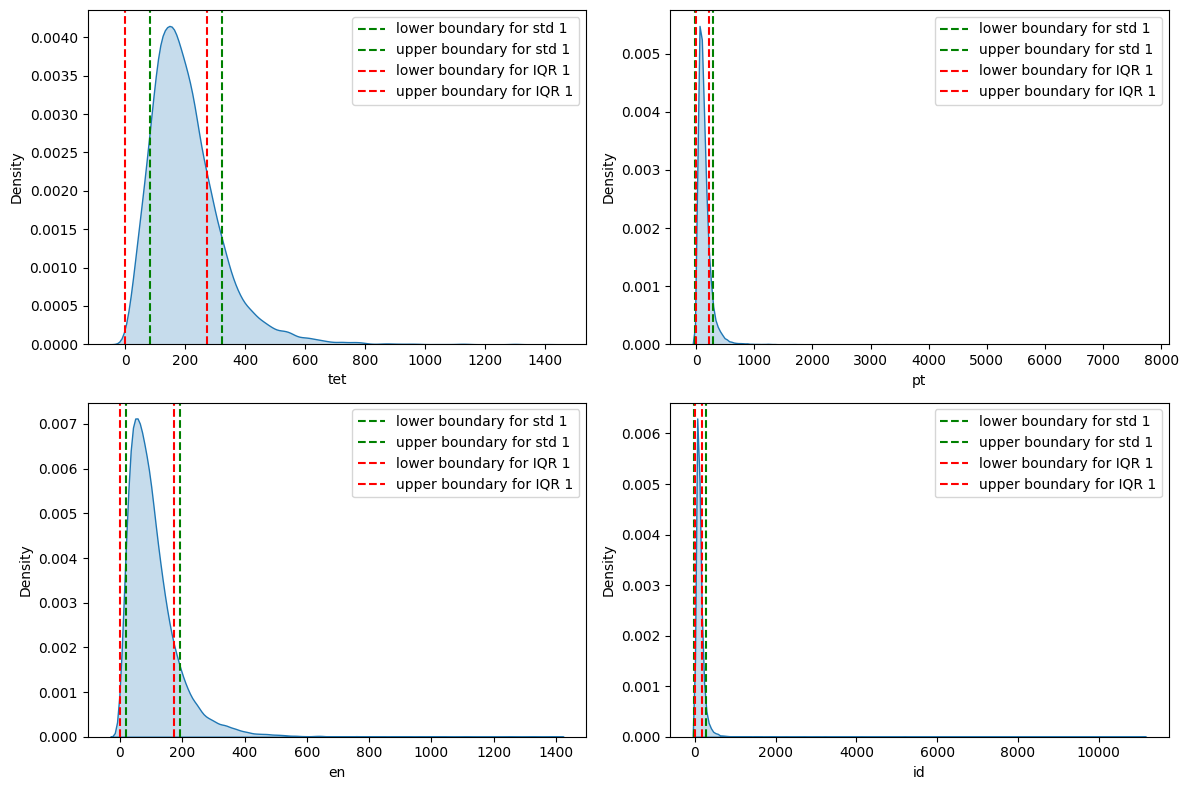

In [9]:
# preview sentence length with Gaussian Distribution
display_data_in_gaussian_dist(clean_data, display_lines=True)

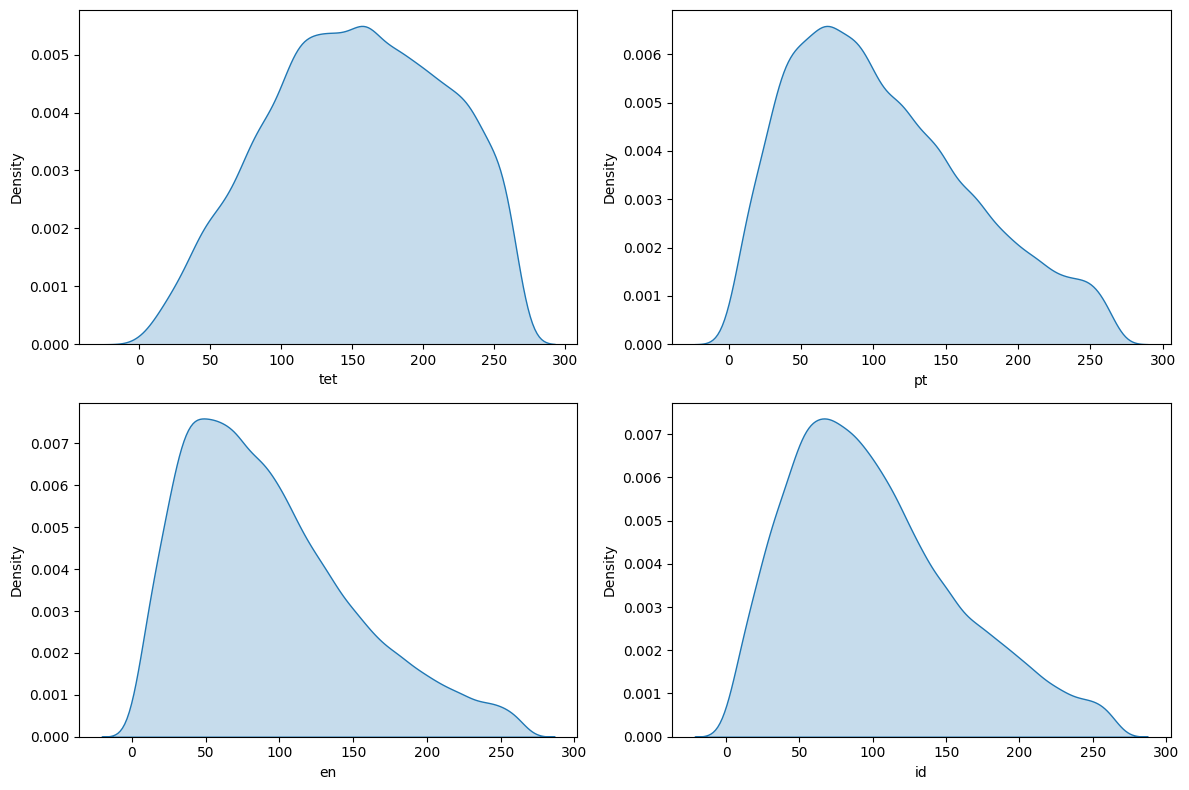

In [10]:
# preview sentence length with Gaussian Distribution after removing outliers
display_data_in_gaussian_dist(clean_data, removed_sentence_outliers, display_lines=False)

In [11]:
# Comparison regarding original data, after removing outliers, and their difference
before = [[len(x)] for x in count_sentences(clean_data)]
after = [[len(x)] for x in removed_sentence_outliers(clean_data)]
difference = [before[i][0] - after[i][0] for i in range(len(before))]
after_removing_outliers = sum([sum(x) for x in after])

print(f"Before removing outliers: {before}\nAfter removing outliers: {after}" )
print(f"Difference (outliers): {difference}\nTotal original data: {len(clean_data)}")
print(f"Total after removing outliers: {after_removing_outliers}\nTotal sentences removed: {sum(difference)}")

Before removing outliers: [[17226], [26604], [33420], [28834]]
After removing outliers: [[13243], [24151], [31768], [26835]]
Difference (outliers): [3983, 2453, 1652, 1999]
Total original data: 106084
Total after removing outliers: 95997
Total sentences removed: 10087


In [12]:
# final clean dataset
final_clean_dataset = final_clean_data(clean_data)
final_clean_dataset.head()

,sentence,language
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet
3,partisipante na’in iha treinamentu ne’e mai ho...,tet
7,enkuantu jenerál manajer cefobom antoninho dou...,tet
8,manufahi dezembru eis jornalista rádiu komu...,tet
10,iha fatin hanesan eis jornalista rádiu komunid...,tet


In [13]:
# confirm if the final_clean_data equals to total_data_after_removing_outliers
try:
    assert len(final_clean_dataset) == after_removing_outliers
    print("Test passed.")
except AssertionError:
    print("The total is different.")

Test passed.


In [14]:
# words summary
print(f"Words summary after normalizing:")
words_summary(final_clean_dataset)

Words summary after normalizing:


,language,max_words/sentence,min_words/sentence,avg_words/sentence,total_words_in_doc
0,tet,49,1,23.368648,309471
1,pt,53,1,17.740922,428461
2,en,56,1,16.900151,536884
3,id,46,1,14.539892,390178


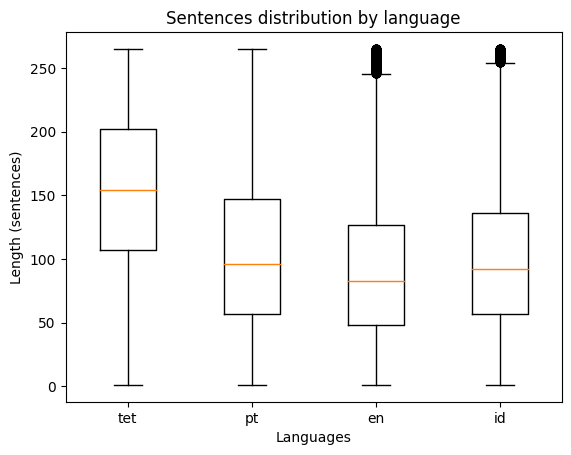

In [15]:
# visualize clean data
display_data_in_boxplot(final_clean_dataset)

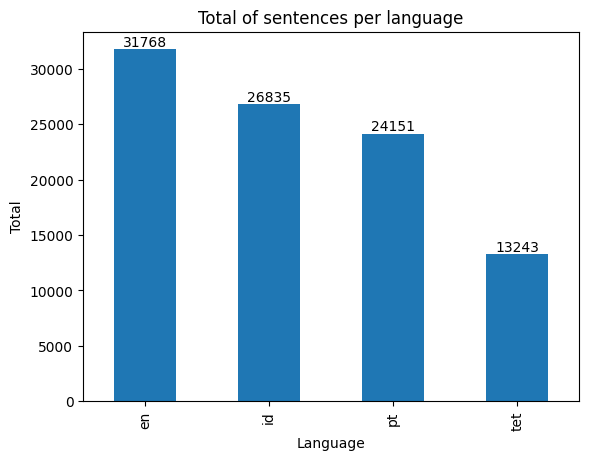

In [16]:
# Clean data info in a bar plot
display_data_in_bar(final_clean_dataset)

In [17]:
# Comparison of the sentences length before and after normalization

# Sentence length
initial_sentence_length = [len(x) for x in clean_data['sentence']]
final_clean_sentence_length = [len(x) for x in final_clean_dataset['sentence']]

# Before normalized
before_sentence_max = np.max(initial_sentence_length)
before_sentence_min = np.min(initial_sentence_length)
before_sentence_avg = np.mean(initial_sentence_length)

# After normalized 
after_sentence_max = np.max(final_clean_sentence_length)
after_sentence_min = np.min(final_clean_sentence_length)
after_sentence_avg = np.mean(final_clean_sentence_length)

print(f'Sentence max length before normalized: {before_sentence_max} and after normalized: {after_sentence_max}')
print(f'Sentence min length before normalized: {before_sentence_min} and after normalized: {after_sentence_min}')
print(f'Sentence avg length before normalized: {before_sentence_avg: .2f} and after normalized: {after_sentence_avg: .2f}')

Sentence max length before normalized: 11121 and after normalized: 265
Sentence min length before normalized: 1 and after normalized: 1
Sentence avg length before normalized:  134.75 and after normalized:  106.94


## Clustering

In [18]:
# select the dataset fraction for clustering
final_clean_dataset_cluster = final_clean_dataset.sample(frac=0.05, random_state=42)
print('Total: ', len(final_clean_dataset_cluster))

Total:  4800


In [19]:
#Generate plot for each clustering algorithm

#kmeans
display_data_in_clustering(final_clean_dataset_cluster, KMeans, "K-Means", using_random_state=True)
#gaussian_mixture
display_data_in_clustering(final_clean_dataset_cluster, GaussianMixture, "Gaussian-Mixture", using_n_components=True, using_random_state=True)
#agglomerative
display_data_in_clustering(final_clean_dataset_cluster, AgglomerativeClustering, "Agglomerative")
# birch
display_data_in_clustering(final_clean_dataset_cluster, Birch, "Birch")

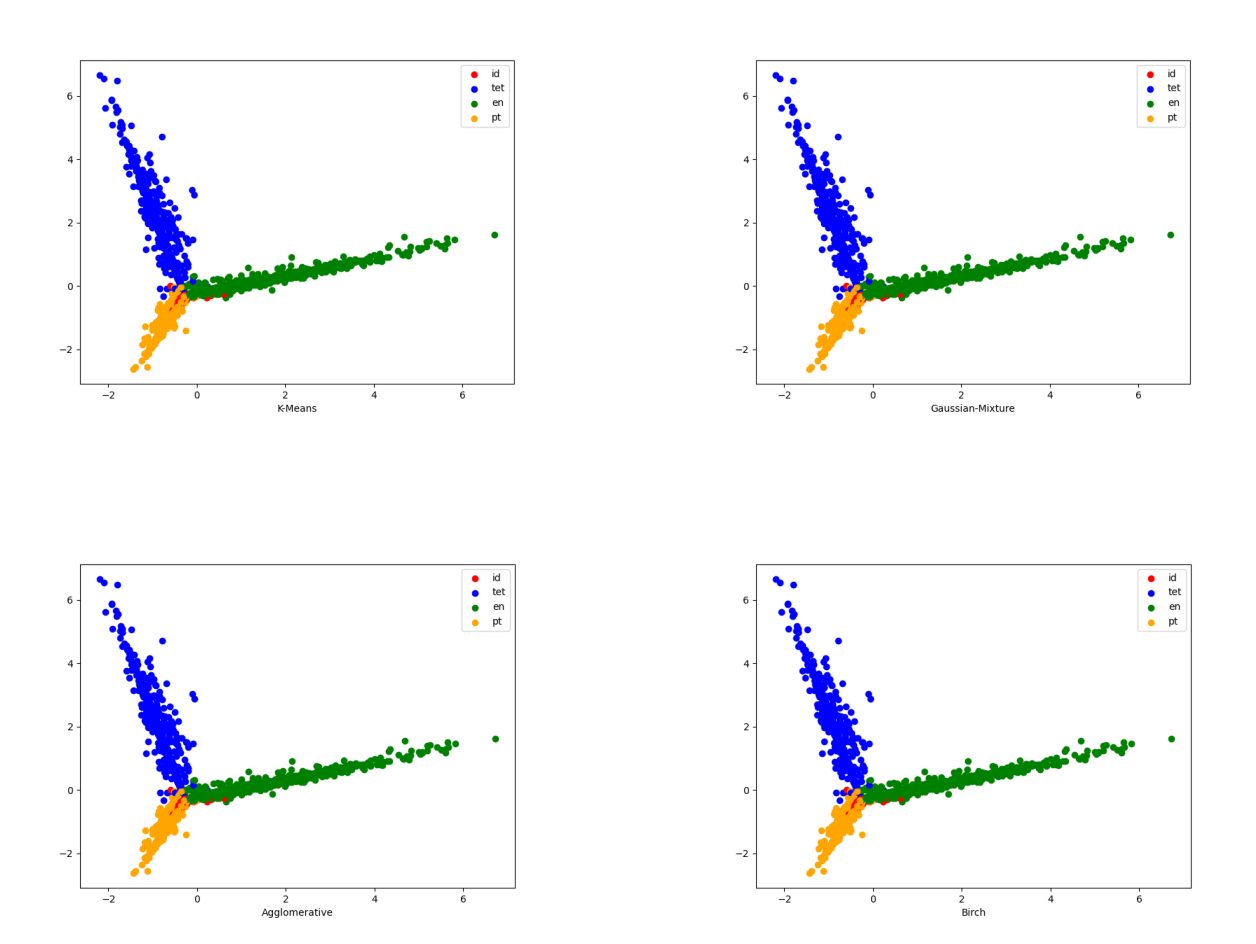

In [20]:
# Compile the plots in an image
display_images("k-means.png", "gaussian-mixture.png", "agglomerative.png", "birch.png")